In [25]:
import numpy as np
import matplotlib.pyplot as plt

Libraries for image pre-processing and classification:


In [26]:
import cv2
import joblib
from skimage.feature import hog

In [27]:
import joblib

In [28]:
svm = joblib.load('svm.joblib')

In [29]:
import json

# Đọc nội dung của tệp annotation.json
with open('images/_annotations.json', 'r') as file:
    annotations = json.load(file)

I have created a function to do it all for you. After importing your image, use the function <code>run_svm</code> to classify the object in your image.


In [30]:
def run_svm(image):
    ## show the original image
    orig_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(orig_image)
    plt.show()
    print('\n')
    ## convert the image into a numpy array
    image = np.array(image).astype('uint8')
    ## resize the image to a size of choice
    image = cv2.resize(image, (64, 64))
    ## convert to grayscale to reduce the information in the picture
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ## extract H.O.G features
    hog_features, hog_image = hog(grey_image,
                          visualize=True,
                          block_norm='L2-Hys',
                          pixels_per_cell=(16, 16))
    ## convert the H.O.G features into a numpy array
    image_array = np.array(hog_features)
    ## reshape the array
    image_array = image_array.reshape(1, -1)
    ## make a prediction
    svm_pred = svm.predict(image_array)
    ## print the classifier

    print('Your image was classified as a ' + str(annotations['labels'][int(svm_pred[0])]))


Now read and classify your image. Replace <code>your_uploaded_file</code> below with the name of your image as seen in your directory.


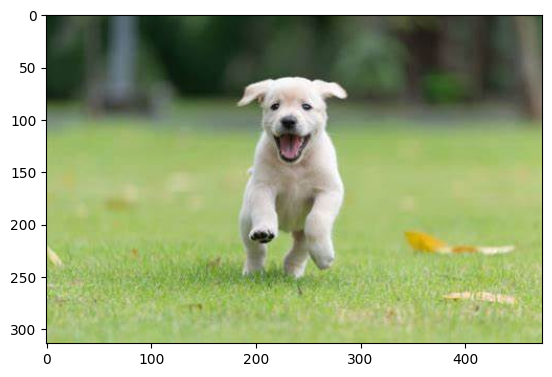



Your image was classified as a dog


In [32]:
## replace "your_uploaded_file" with your file name
my_image = cv2.imread("OIP.jpg")
## run the above function on the image to get a classification
run_svm(my_image)